## Chapter 4 -  Training Models

### Logistic Regression

Logistic regression / Logit regression is commonly used to estimate the probability that an instance belongs to a particular class. If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class. Otherwise it belongs to the complement class. This makes logistic regression a binary classifier.

The central problem is to model the relationship with a probability of an event occuring: $p(\mathbf x) = \Pr (y=1|\mathbf x)$ from the predictors $\mathbf x$. If we use the linear model 

$$p(\mathbf x) = \beta_0 + \beta_1 x_1$$ 

then we could get values of the probability, $\Pr(\cdot)$ that is outside $[0,1]$. 

Hence, we transform the linear model to the logistic model:

$$p(\mathbf x) = \frac{\exp(\beta_0 + \beta_1 x_1)}{1+\exp(\beta_0 + \beta_1 x_1)} = \frac{1}{1+\exp[-(\beta_0 + \beta_1 x_1)]}$$

from there, after the evaluation of the RHS, we obtain the result:

$$y = \begin{cases}1 \text{ if } \hat{p}(\mathbf x)\geq0.5\\0 \text{ if } \hat{p}(\mathbf x)<0.5\end{cases}$$

Note that $0.5$ is an arbitrary threshold. It can be shifted up and down in the range $(0,1)$.

After manipulation of the logit model, we find:
$$\frac{p(\mathbf x)}{1-p(\mathbf x)} = \exp(\beta_0 + \beta_1 x_1)$$

where the LHS is the <b>odds</b> and can take on any value between $0$ and $\infty$. If the odds are close to zero then there is a low probability of $y=1$. If the odds are very large then there $\Pr(y=1)$ is high. 

By taking log on both sides, we obtain

$$\log \frac{p(\mathbf x)}{1-p(\mathbf x)} = \beta_0 + \beta_1 x_1$$

and so we say the logistic regression model has a <b>logit</b> or <b>log-odds</b> that is linear in $\mathbf x$.

In a logistic regression model, increasing $x_1$ by 1 unit changes the log odds by $\beta_1$. However, because the relationship between $p$ and $\mathbf x$ is not linear, a one unit increase in $x_1$ does not correspond to a $\beta_1$ change in $p$. The amount that $p$ changes due to a one unit change in $x_1$ will depend on the current value of $\mathbf x$. 

#### Estimation using Maximum Likelihood

In order to obtain the estimates $\hat{\beta_0}$ and $\hat{\beta_1}$, we use maximum likelihood estimation. The intuition is to fit a model - seeking coefficient estimates such that the predicted probability of each observation in the training set, for each type of event, is the highest. We first obtain the likelihood function of the observed data:

$$L(\beta) = L(\beta_0, \beta_1) = \prod_{i=1}^n p(\mathbf x_i)^{y_i} \cdot(1-p(\mathbf x_i))^{1-y_i}$$

Observe that for each sample, the term in the product reduces to $p(\mathbf x_i)$ if $y_i=1$ and $1-p(\mathbf x_i)$ if $y_i=0$. From the likelihood function, we obtain the cost function in this problem - the log-likelihood function:

$$\begin{align}J(\Theta) = l(\beta) = l(\beta_0, \beta_1) 
&= \sum_{i=1}^n y_i \log p(\mathbf x_i) + (1-y_i) \log (1-p(\mathbf x_i)) \\
&= \sum_{i=1}^n y_i \log p(\mathbf x_i) + \log (1-p(x_i)) - y_i \log(1-p(\mathbf x_i))  \\
&= \sum_{i=1}^n \log (1-p(\mathbf x_i)) + \sum_{i=1}^m y_i \log \frac{p(\mathbf x_i)}{1 - p(\mathbf x_i)}\\
&= \sum_{i=1}^n -\log (1+e^{\beta_0 + \beta_1x_i}) + \sum_{i=1}^m y_i ({\beta_0 + \beta_1x_i})\end{align}$$

There is no closed-form solution to the log likelihood for logistic regression so we perform gradient descent for each of the parameters to estimate.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [2]:
df = pd.read_csv('Default.csv', index_col=0)
df['y'] = df['default'].apply(lambda x: 1 if x == 'Yes' else 0)
df['is_student'] = df['student'].apply(lambda x: 1 if x == 'Yes' else 0)
df['income_000'] = df['income'].apply(lambda x: x/1000)

In [3]:
X1 = df[['balance']].copy()
train_df1 = df[['balance', 'y']].copy()
X2 = df[['balance', 'income_000', 'is_student']].copy()

y = df['y'].copy()

In [4]:
# Logistic Regression using sklearn
reg = LogisticRegression()
reg.fit(X1, y)
print(reg.intercept_, reg.coef_)

[-10.65132824] [[0.00549892]]


In [5]:
# Logistic Regression using statsmodels
reg2 = sm.Logit(y, sm.add_constant(X1))
results2 = reg2.fit()
Theta_hat2 = list(results2.params)
print(["{:.6f}".format(t) for t in Theta_hat2])

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
['-10.651331', '0.005499']


In [6]:
print(results2.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006


In this example, we see that $\hat{\beta_1}=0.0055$. This indicates that a one-unit increase in `balance` results in a 0.0055 unit increase in the log odds. An increase in balance is an associated with an increase in the probability of default.

Hypothesis testing can also be applied to logistic regression. The $z$-statistic is similar in concept to the $t$-statistic in linear regression. A large value of the $z$-statistic (and correspondingly a small $p$-value) indicates evidence in the null hypothesis, where $\beta_1$ is insignificant and near zero. Since the $p$-value for `balance` is small, we reject the null in favour of the alternate hypothesis. There is indeed an association between `balance` and `default`.

In [7]:
# Prediction
results2.predict([[1,1000], [1,2000]])

array([0.00575215, 0.58576937])

For prediction, the probability of someone defaulting with a balance of \\$1000 is $0.00576$ which is below 1\%. This increases drastically to $59\%$ when the balance increases to \\$2000.

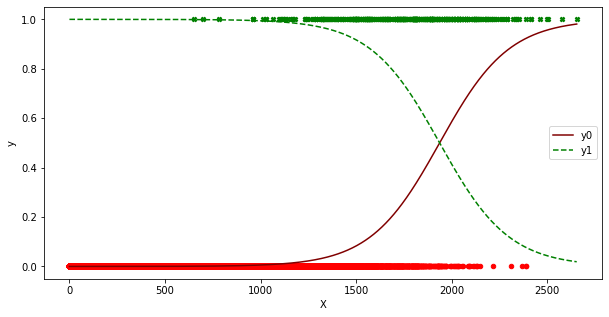

In [8]:
# Plotting for different alpha values
lin_X = np.linspace(X1['balance'].min(),X1['balance'].max(),1000).reshape(-1,1)
y_prob = results2.predict(sm.add_constant(lin_X))
y_prob1 = 1-y_prob
pred_df = pd.DataFrame({'X' : lin_X.flatten(), 'y0' : y_prob, 'y1' : y_prob1})
# display(pred_df.head())
fig, ax = plt.subplots(figsize=(10, 5))
train_df1[train_df1.y==0].plot(kind='scatter', x='balance', y='y', ax=ax, color='red')
train_df1[train_df1.y==1].plot(kind='scatter', x='balance', y='y', ax=ax, color='green', marker='X')
pred_df.plot(kind='line', x='X', y='y0', ax=ax, color='maroon')
pred_df.plot(kind='line', x='X', y='y1', ax=ax, color='green', style='--')
plt.show()

In [9]:
# Using dummy variables for prediction
X3 = sm.add_constant(df[['is_student']].copy())
reg3 = sm.Logit(y, X3)
results3 = reg3.fit()
print(results3.summary2().tables[1])

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7
               Coef.  Std.Err.          z     P>|z|    [0.025    0.975]
const      -3.504128  0.070713 -49.554094  0.000000 -3.642723 -3.365532
is_student  0.404887  0.115019   3.520177  0.000431  0.179454  0.630320


We can use dummy variables to assess for the `is_student` variable. Also note that for this variable `is_student`, the associated $p$-value is also small, indicating it is significant.

In [10]:
results3.predict([[1,1], [1,0]])
# We can see that students have a higher probability of default compared to non-students.

array([0.04313859, 0.02919501])

### Multivariate Logistic Regression

Multivariate logistic regression extends the above to have more than 1 predictor:

$$p(\mathbf x) = \frac{\exp(\Theta^T\mathbf x)}{1+\exp(\Theta^T\mathbf x)} = \frac{1}{1+\exp[-(\Theta^T\mathbf x)]}$$

where $\Theta = \begin{pmatrix}\beta_0, \beta_1, \cdots, \beta_p\end{pmatrix}^T$ and $\mathbf x = \begin{pmatrix}1, x_{1}, \cdots, x_{p}\end{pmatrix}^T$

Similarly, the cost function of multivariate logistic regression is:

$$\begin{align}J(\Theta) = l(\Theta)
&= \sum_{i=1}^n -\log (1+e^{\Theta^T\mathbf x}) + \sum_{i=1}^m y_i (\Theta^T\mathbf x)\end{align}$$

In [11]:
# Multivar Logistic Regression using statsmodels
multivarreg = sm.Logit(y, sm.add_constant(X2))
results22 = multivarreg.fit()
Theta_hat21 = list(results22.params)
print(["{:.6f}".format(t) for t in Theta_hat21])

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
['-10.869045', '0.005737', '0.003033', '-0.646776']


In [12]:
print(results22.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income_000     0.0030      0.008      0.370      0.712      -0.013       0.019
is_student    -0.6468      0.236     -2.738      0.006      -1.110      -0.184


In this model, we see that the $p$-value associated with `income` is very large. The coefficient for the dummy variable `is_student` is also negative, indicating students are <i>less likely</i> to default. 

It is likely that the variables `is_student` and `balance` are correlated. 

Note that logistic regression assume that the model and the output are linearly correlated.

### Softmax Regression

Logistic regression can be generalised to the softmax regression. Generalising the function, given that there are now $K$ different classes, the probability that the instance is in class $k$ is:

$$
\hat{p_k(\mathbf x)} = \frac{e^{\Theta^T_k \mathbf x_i}}{\sum_{j \in K} \exp{\Theta^T_j \mathbf x_i}} 
$$

For the cost function, use the cross entropy cost function:

$$J(\Theta) = \sum_{i=1}^n\sum_{k=1}^K y_k^{(i)}\log \begin{pmatrix}\hat{p_k}^{(i)}\end{pmatrix}$$

and the gradient is:

$$\nabla_{\theta_k} J(\Theta) = \frac1m \sum_{i=1}^m \begin{pmatrix}\hat{p_k}^{(i)}-\hat{y_k}^{(i)}\end{pmatrix}\mathbf x_i$$

Similarly, compute the gradient vector for each class and use Gradient Descent to find the parameter matrix $\Theta$ that minimises the cost function.

In [13]:
# Ingest
iris = datasets.load_iris()
Xiris = pd.DataFrame(iris['data'], columns=iris['feature_names'])
display(Xiris.head())
yiris = pd.Series([1 if t else 0 for t in list(iris['target']==2) ])
display(yiris.head())
feat2 = Xiris.iloc[:,2:4]
y2iris = iris['target']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0    0
1    0
2    0
3    0
4    0
dtype: int64

In [14]:
# Train
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(feat2, y2iris)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
# Train using statsmodels
mnlogit = sm.MNLogit(y2iris, sm.add_constant(feat2))
results3 = mnlogit.fit(maxiter=90)
print(results3.summary())

         Current function value: 0.068545
         Iterations: 90
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      144
Method:                           MLE   Df Model:                            4
Date:                Tue, 19 May 2020   Pseudo R-squ.:                  0.9376
Time:                        12:02:24   Log-Likelihood:                -10.282
converged:                      False   LL-Null:                       -164.79
Covariance Type:            nonrobust   LLR p-value:                 1.227e-65
              y=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -74.7912   3.63e+04     -0.002      0.998   -7.12e+04    7.11e+04
petal length (cm)    28.0872   1.53e+04     

/Users/bryanlim/.pyenv/versions/3.7.2/envs/botanic/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [15]:
# Predict
print(softmax_reg.predict([[5,2]]))
print(softmax_reg.predict_proba([[5,2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


In [33]:
results3.predict([[1,5,2]])

array([[1.28938767e-50, 1.22039372e-02, 9.87796063e-01]])